In [ ]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt

1. Define the RL Environment
Example Scenario
Theme: Treasure Hunt Grid World
States:
A 5x5 grid with positions represented as tuples, e.g., (0, 0) to (4, 4). Total: 25 states.
Actions:
{Up, Down, Left, Right}
Rewards:
+10: Reaching the treasure.
-10: Stepping into a trap.
-1: Each step taken to encourage efficiency.
Objective: Navigate the agent to the treasure while avoiding traps and minimizing steps


In [ ]:
class TreasureHuntEnv(gym.Env):
    def __init__(self):
        super(TreasureHuntEnv, self).__init__()
        self.grid_size = 6
        self.state_space = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=int)

        self.treasure = (5, 5)
        self.traps = [(2, 2), (3, 3), (4, 4)]
        self.bonus = [(1, 1), (4, 1)]
        self.reset()

    def step(self, action):
        if action == 0 and self.agent_pos[0] > 0:
            self.agent_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.grid_size - 1:
            self.agent_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0:
            self.agent_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.grid_size - 1:
            self.agent_pos[1] += 1

        reward = -1
        if tuple(self.agent_pos) in self.traps:
            reward = -10
        elif tuple(self.agent_pos) in self.bonus:
            reward = 5
        elif tuple(self.agent_pos) == self.treasure:
            reward = 20

        done = tuple(self.agent_pos) == self.treasure
        return np.array(self.agent_pos), reward, done, {}

    def reset(self):
        self.agent_pos = [0, 0]
        return np.array(self.agent_pos)

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))
        grid[tuple(zip(*self.traps))] = -1
        grid[tuple(zip(*self.bonus))] = 0.5
        grid[self.treasure] = 1
        grid[tuple(self.agent_pos)] = 2
        plt.imshow(grid, cmap='coolwarm', interpolation='nearest')
        plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Iteration 0:


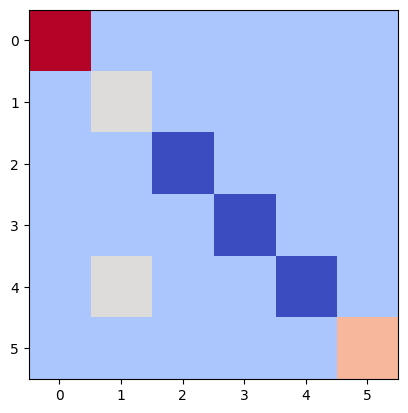

State: [0 0], Action: 0, Reward: -1, Next State: [0 0]
Iteration 1:


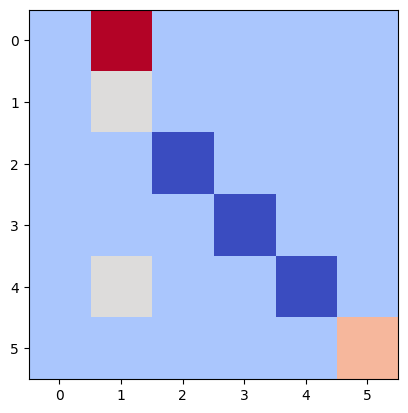

State: [0 0], Action: 3, Reward: -1, Next State: [0 1]
Iteration 2:


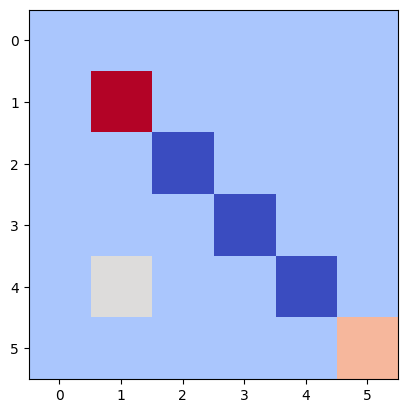

State: [0 1], Action: 1, Reward: 5, Next State: [1 1]
Iteration 3:


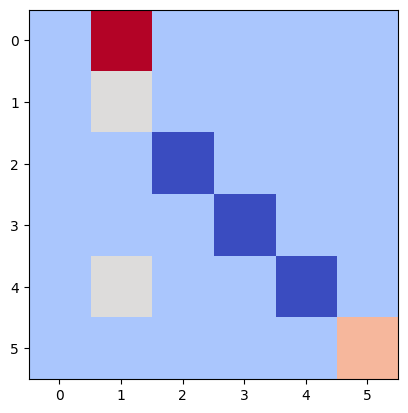

State: [1 1], Action: 0, Reward: -1, Next State: [0 1]
Iteration 4:


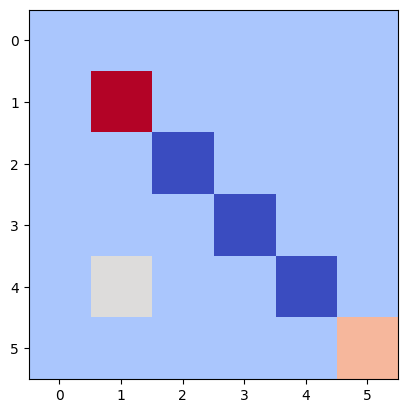

State: [0 1], Action: 1, Reward: 5, Next State: [1 1]
Iteration 5:


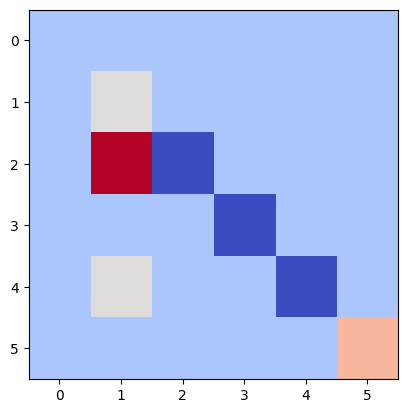

State: [1 1], Action: 1, Reward: -1, Next State: [2 1]
Iteration 6:


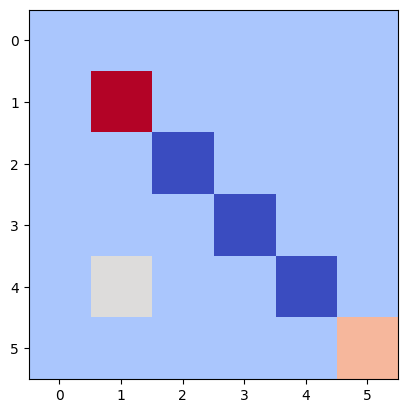

State: [2 1], Action: 0, Reward: 5, Next State: [1 1]
Iteration 7:


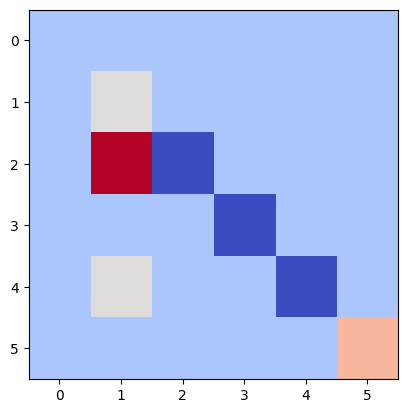

State: [1 1], Action: 1, Reward: -1, Next State: [2 1]
Iteration 8:


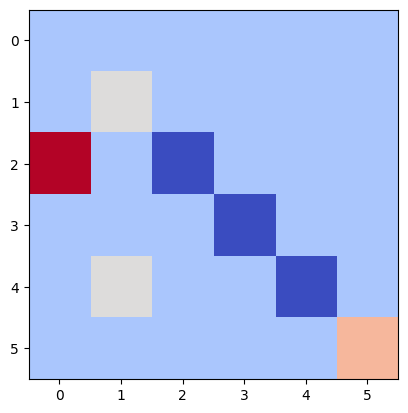

State: [2 1], Action: 2, Reward: -1, Next State: [2 0]
Iteration 9:


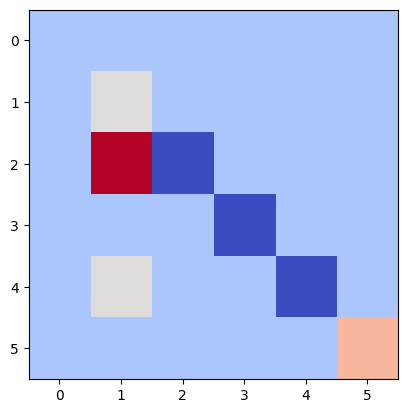

State: [2 0], Action: 3, Reward: -1, Next State: [2 1]


In [ ]:
env = TreasureHuntEnv()
state = env.reset()
for i in range(10):
    print(f"Iteration {i}:")
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    env.render()
    print(f"State: {state}, Action: {action}, Reward: {reward}, Next State: {next_state}")
    state = next_state
    if done:
        break
